<a href="https://colab.research.google.com/github/mattvenn/flipflop_demo/blob/main/schematic/tg_ff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transmission Gate Flip Flop Schematic as code using [Schemdraw](https://schemdraw.readthedocs.io/en/stable/)
```
Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0
```


In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
!pip install schemdraw

##  tg_ff

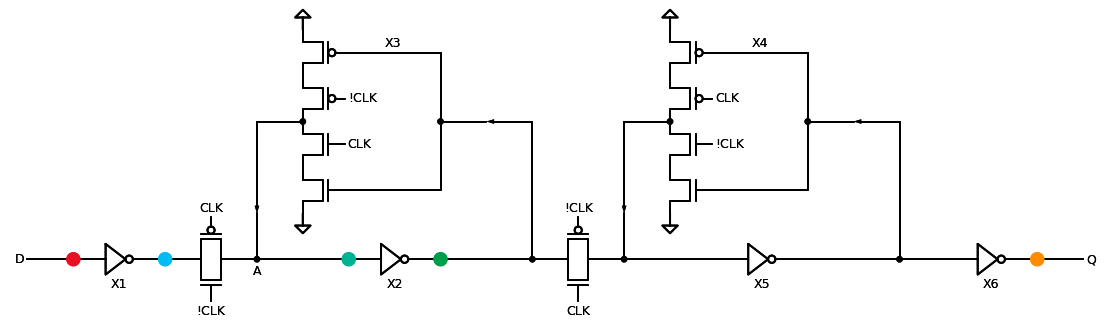

In [26]:
import schemdraw
import schemdraw.logic as logic
import schemdraw.elements as elm
def latch(left_label='', top_label='', not_label='', pfet_label='', nfet_label='', l_probe_color='', r_probe_color=''):
  with schemdraw.Drawing(show=False) as d:
      A = d.add(elm.Dot().label(left_label, 'bottom'))
      d += elm.Line().length(d.unit*0.5).up()
      d += elm.Line(arrow='<-').up()
      d += elm.Line().length(d.unit*0.5).right()
      D = d.add(elm.Dot())
      d.move(0, d.unit)
      d += elm.GroundSignal().flip()
      pfet = d.add(elm.PFet())
      d += elm.PFet().label(pfet_label, 'right')
      d += elm.NFet().at(D.center).label(nfet_label, 'right')
      nfet = d.add(elm.NFet())
      d += elm.GroundSignal()
      d += elm.Line().at(A.center).right(d.unit*1)
      if l_probe_color:
        d += elm.Dot(radius=radius).color(l_probe_color)
      d += logic.Not().label(not_label, 'bottom')
      if r_probe_color:
        d += elm.Dot(radius=radius).color(r_probe_color)
      d += elm.Line().right(d.unit*1.0)
      B = d.add(elm.Dot() )
      d += elm.Line().up(d.unit*1.5 )
      d += elm.Line(arrow='->').length(d.unit*0.5).left()
      d += elm.Line().length(d.unit*0.5)
      C = d.add(elm.Dot())
      d += elm.Wire('-|').at(pfet.gate).label(top_label, 'top').to(C.center)
      d += elm.Wire('-|').at(nfet.gate).to(C.center)
      d.here = B.center
      return elm.ElementDrawing(d)

with schemdraw.Drawing(file="tgff.png") as d:
    radius = 0.2
    d += elm.Line().length(d.unit*0.5).label('D', 'left')
    d += elm.Dot(radius=radius).color('#e81123')
    d += logic.Not().label('X1', 'bottom')
    d += elm.Dot(radius=radius).color('#00bcf2')
    d += elm.PFet2().hold().label('CLK', 'top')
    d += elm.NFet2().flip().label('!CLK', 'bottom')
    d += latch(left_label='A', top_label='X3', not_label='X2', pfet_label="!CLK", nfet_label="CLK", l_probe_color='#00b294', r_probe_color='#009e49')
    d += elm.PFet2().hold().label('!CLK', 'top')
    d += elm.NFet2().flip().label('CLK', 'bottom')
    d += latch(top_label='X4', not_label='X5', pfet_label="CLK", nfet_label="!CLK")
    d += elm.Line().length(d.unit*0.5)
    d += logic.Not().label('X6', 'bottom')
    d += elm.Dot(radius=radius).color('#ff8c00')
    d += elm.Line().length(d.unit*0.5).label('Q', 'right')

## clock_low

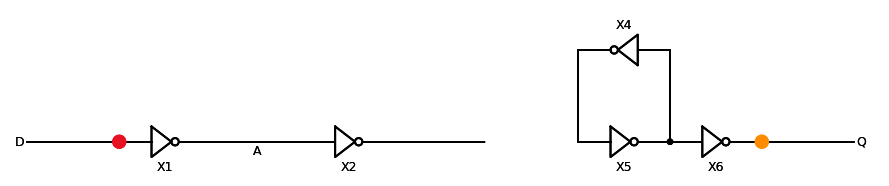

In [27]:
with schemdraw.Drawing(file="clock_low.png") as d:
    radius = 0.2
    d += elm.Line().label('D', 'left')
    d += elm.Dot(radius=radius).color('#e81123')
    d += logic.Not().label('X1', 'bottom')
    #d += elm.Dot(radius=radius).color('#00bcf2')
    d += elm.Line().label('A', 'bottom')
    #d += elm.Dot(radius=radius).color('#00b294')
    d += logic.Not().label('X2', 'bottom')
    #d += elm.Dot(radius=radius).color('#009e49')
    d += elm.Line()
    d += elm.Line().color('white')
    d += logic.Not().label('X5', 'bottom')
    dot = d.add(elm.Dot())
    d += logic.Not().label('X6', 'bottom')
    d += elm.Dot(radius=radius).color('#ff8c00')
    d += elm.Line().label('Q', 'right')

    d += elm.Line('up').at(dot.center)
    d += logic.Not('left').label('X4')
    d += elm.Line('down')

## clock_high

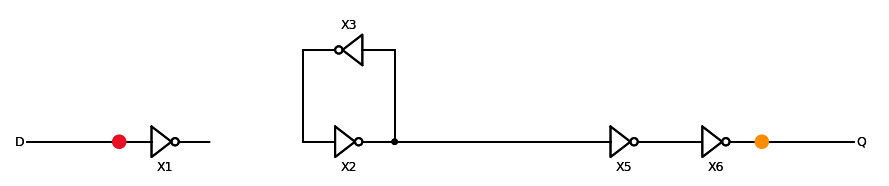

In [28]:
with schemdraw.Drawing(file="clock_high.png") as d:
    radius = 0.2
    d += elm.Line().label('D', 'left')
    d += elm.Dot(radius=radius).color('#e81123')
    d += logic.Not().label('X1', 'bottom')
    #d += elm.Dot(radius=radius).color('#00bcf2')
    d += elm.Line().color('white').label('A', 'bottom')
    #d += elm.Dot(radius=radius).color('#00b294')
    d += logic.Not().label('X2', 'bottom')
    #d += elm.Dot(radius=radius).color('#009e49')
    dot = d.add(elm.Dot())
    d += elm.Line()
    d += elm.Line()
    d += logic.Not().label('X5', 'bottom')
    d += logic.Not().label('X6', 'bottom')
    d += elm.Dot(radius=radius).color('#ff8c00')
    d += elm.Line().label('Q', 'right')
    d += elm.Line('up').at(dot.center)
    d += logic.Not('left').label('X3')
    d += elm.Line('down')

## clock_gen

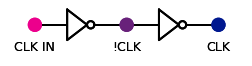

In [29]:
with schemdraw.Drawing(file='clock_gen.png') as d:
    d += elm.Line().length(0).label('CLK IN', 'bottom', ofst=0.5)
    d += elm.Dot(radius=radius).color('#ec008c')
    d += logic.Not() # .label('1+2', 'top')
    d += elm.Dot(radius=radius).color('#68217a')
    d += elm.Line().length(0).label('!CLK', 'bottom', ofst=0.5)
    d += logic.Not() # .label('3+4', 'top')
    d += elm.Dot(radius=radius).color('#00188f')
    d += elm.Line().length(0).label('CLK', 'bottom', ofst=0.5)

## latch1

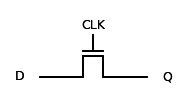

In [30]:
with schemdraw.Drawing(file='latch1.png') as d:
    d += elm.Line().length(1).label('D', "left", ofst=0.5)
    d += elm.NFet().up().label('CLK', 'right')
    d += elm.Line().right().length(1).label('Q', "right", ofst=0.5)

## latch2

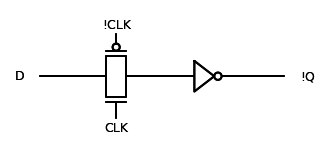

In [31]:
with schemdraw.Drawing(file='latch2.png') as d:
    d += elm.Line().length(1).label('D', "left", ofst=0.5)
    d += elm.PFet2().hold().label('!CLK', 'top')
    d += elm.NFet2().flip().label('CLK', 'bottom')
    d += logic.Not()
    d += elm.Line().right().length(1).label('!Q', "right", ofst=0.5)

## latch3

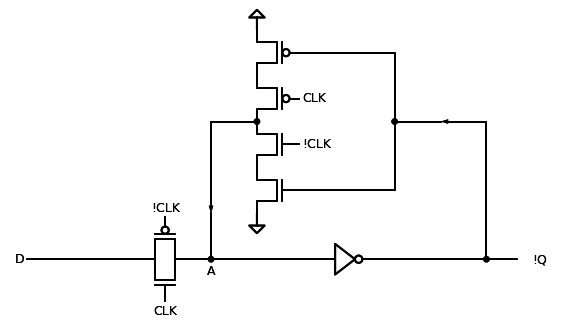

In [32]:
with schemdraw.Drawing(file='latch3.png') as d:
    d += elm.Line().label('D', 'left')
    d += elm.PFet2().hold().label('!CLK', 'top')
    d += elm.NFet2().flip().label('CLK', 'bottom')
    d += latch(left_label='A', pfet_label="CLK", nfet_label="!CLK")
    d += elm.Line().right().length(1).label('!Q', "right", ofst=0.5)